Download the Colour Lena image, call it fc 
 - convert fc to grayscale fg using 
    - Averaging of r,g,b 
    - Built-in function 
    - Display grayscale images and check if there is any difference 
- Resize fg by factor 2 using
    - Nearest Neighbor Interpolation (with and without Built-in function)
    - Bi-linear Interpolation (with and without Built-in function)
    - Bi-cubic interpolation (Using built-in function)  

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

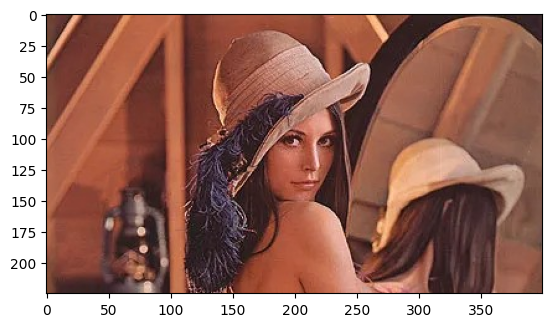

In [28]:
#load and display the image
fc = cv2.imread('lena_image.jpg')
#convert bgr to rgb 
fc = cv2.cvtColor(fc, cv2.COLOR_BGR2RGB)
plt.imshow(fc)

[[ -8.66666667  -8.66666667  -8.66666667 ...  -3.          -3.
   -3.        ]
 [ -8.66666667  -8.66666667  -8.66666667 ...  -3.          -3.
   -3.        ]
 [ -9.          -9.          -8.66666667 ...  -3.          -2.66666667
   -2.66666667]
 ...
 [-10.         -10.33333333 -10.         ...  -9.33333333 -10.66666667
  -11.        ]
 [-10.         -10.33333333 -10.         ... -10.33333333 -11.
  -11.        ]
 [-11.         -10.33333333 -10.         ... -10.66666667 -10.66666667
  -10.66666667]]


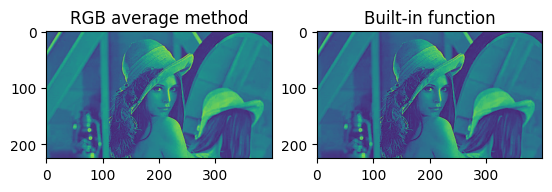

In [29]:
size = fc.shape

gray_image_1 = np.zeros(size[0:2])
for i in range(size[0]):
    for j in range(size[1]):
        gray_image_1[i][j] = np.mean(fc[i][j])

#Display image 
plt.subplot(121)
plt.imshow(gray_image_1)
plt.title('RGB average method')

plt.subplot(122)
gray_image_2 = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_2)
plt.title('Built-in function')

print(gray_image_2 - gray_image_1)t
#Both the images are not same.

In [30]:
height, width, _ = fc.shape

Text(0.5, 1.0, 'without Built-in function')

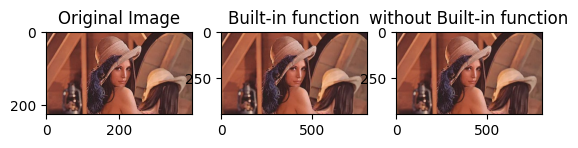

In [31]:
#nearest neighbor interpolation
plt.subplot(131)
plt.imshow(fc)
plt.title('Original Image')

#using built-in fucntion
resized_img = cv2.resize(fc, (width*2, height*2))

plt.subplot(132)
plt.imshow(resized_img)
plt.title('Built-in function')

new_height = height*2
new_width = width*2

#without built-in function
resized_image = np.zeros((new_height, new_width, fc.shape[2]) if len(fc.shape) == 3 else (new_height, new_width), dtype=fc.dtype)

scale=0.5

for y in range(new_height):
    for x in range(new_width):
        original_x = int(round(x*scale))
        original_y = int(round(y*scale))

        original_x = min(original_x, width - 1)
        original_y = min(original_y, height - 1)
        resized_image[y, x] = fc[original_y, original_x]
        
plt.subplot(133)
plt.imshow(resized_img)

plt.title('without Built-in function')


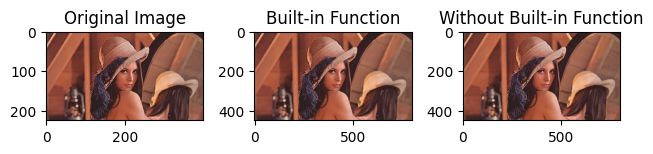

In [33]:
plt.subplot(131)
plt.imshow(fc)
plt.title('Original Image')

# Using built-in function for resizing
resized_builtin = cv2.resize(fc, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)
plt.subplot(132)
plt.imshow(resized_builtin)
plt.title('Built-in Function')

# Without built-in function
new_height = height * 2
new_width = width * 2

resized_image = np.zeros((new_height, new_width, fc.shape[2]), dtype=fc.dtype)

scale = 0.5  # Original -> Scaled mapping factor (1 / scaling)

for i in range(new_height):
    for j in range(new_width):
        # Map (i, j) in the new image to (x, y) in the original image
        x = i * scale
        y = j * scale

        # Identify surrounding pixel coordinates
        x1, y1 = int(np.floor(x)), int(np.floor(y))
        x2, y2 = min(x1 + 1, height - 1), min(y1 + 1, width - 1)

        # Compute distances for interpolation
        dx1, dy1 = x - x1, y - y1
        dx2, dy2 = 1 - dx1, 1 - dy1

        # Perform bilinear interpolation
        for c in range(fc.shape[2]):  # For RGB channels
            resized_image[i, j, c] = (
                fc[x1, y1, c] * dx2 * dy2 +
                fc[x2, y1, c] * dx1 * dy2 +
                fc[x1, y2, c] * dx2 * dy1 +
                fc[x2, y2, c] * dx1 * dy1
            )

plt.subplot(133)
plt.imshow(resized_image)
plt.title('Without Built-in Function')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Built-in Function')

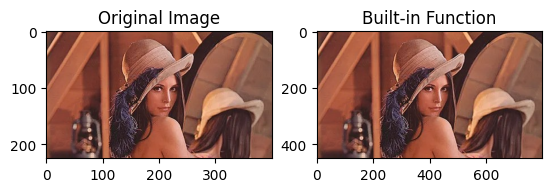

In [34]:
plt.subplot(121)
plt.imshow(fc)
plt.title('Original Image')

# Using built-in function for resizing
resized_builtin = cv2.resize(fc, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
plt.subplot(122)
plt.imshow(resized_builtin)
plt.title('Built-in Function')